# AIRBNB New York Dataset 

The aim of this project is to study the AIRBNB dataset and draw some insight from it. 

# Import Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [2]:
#Loading Dataset
data = pd.read_csv('AB_NYC_2019.csv')

In [3]:
data.shape

(48895, 16)

In [4]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [6]:
#Checking for Duplicates if any 
data.duplicated().sum()

0

In [7]:
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [9]:
#Check for Null values 

data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

From above we see that the name, host name, last review and reviews per month hae null/nan values. Therefore we will
drop these columns except the reviews per month column where we input value of 0.

In [10]:
#Delete the name, id, host name , last review column
data.drop(['name', 'id', 'host_name', 'last_review'], axis= 1, inplace = True)

In [11]:
#Fill na
data = data.fillna({'reviews_per_month': 0})

In [12]:
data.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027D01A86668>,
      dtype=object)

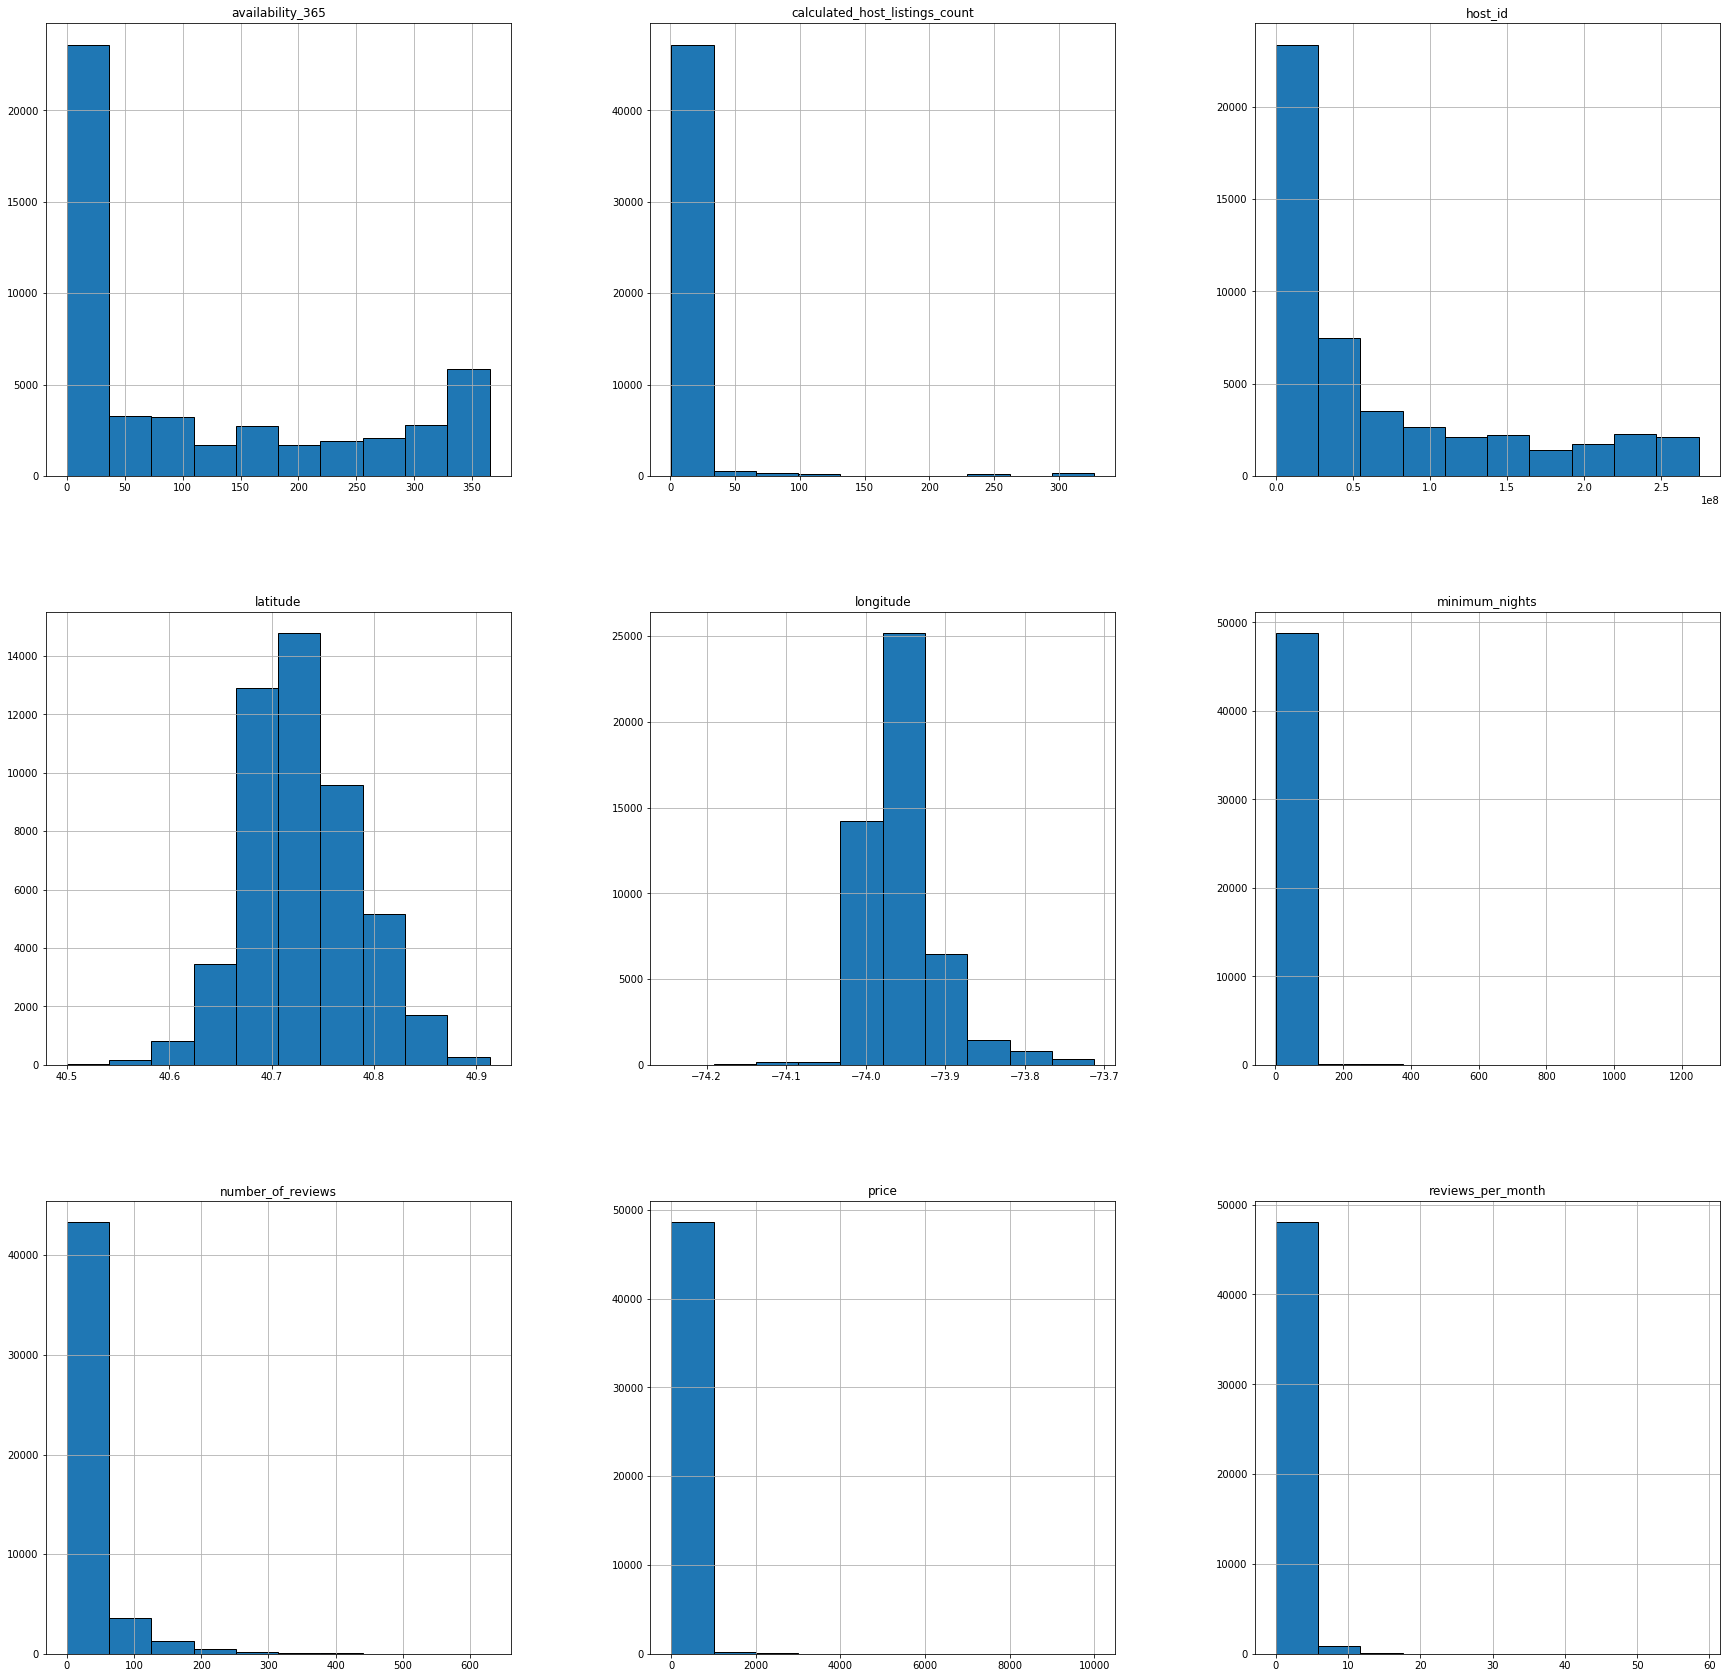

In [13]:
# Data Visualization 
data.hist(edgecolor= 'black', figsize=(30,30))

In [14]:
#sns.pairplot(data)
#plt.show()

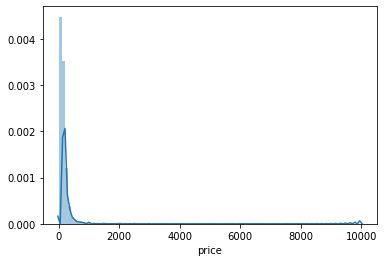

In [15]:
#Target Variable 
sns.distplot(data.price, bins=100)

In [16]:
#Categorical Features 

cat_features = data.select_dtypes(include=[np.object])

In [17]:
cat_features.head(3)

,neighbourhood_group,neighbourhood,room_type
0,Brooklyn,Kensington,Private room
1,Manhattan,Midtown,Entire home/apt
2,Manhattan,Harlem,Private room


In [18]:
#Neighbourhood Group 

data.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [19]:
data.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

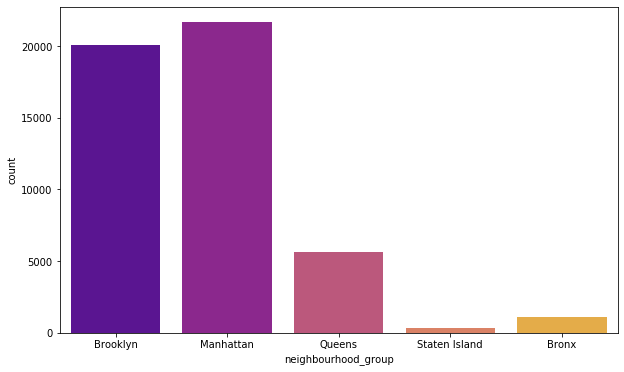

In [20]:
fig = plt.figure(figsize= (10,6))
sns.countplot(data.neighbourhood_group, palette= 'plasma')

We notice that most AIRBNB houses are located in the Manhattan and Brooklyn neoighbourhood groups

In [21]:
#Neighbourhood 
len(data.neighbourhood.unique())

221

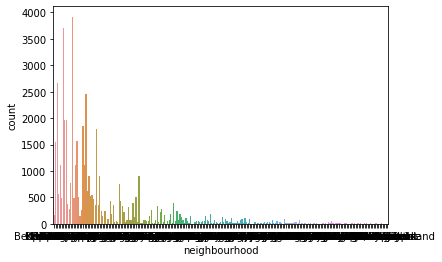

In [22]:
sns.countplot(data.neighbourhood)

Seeing that we have a lot of neighbourhood in the dataset, we are going to be looking at the top ten neighbourhoods. 

In [23]:
top_neighbourhood = data.neighbourhood.value_counts().head(10)
print(top_neighbourhood)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64


The Neighbourhood with the most houses is the Williamsburg which is located in the Brookyln Neighbourhood group. MOst of the houses in this neighbourhood consist of Entire room and Private room.

In [24]:
df = data[data['neighbourhood']=='Williamsburg']
df

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
15,15991,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,1.20,1,46
20,21207,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,0.07,1,0
52,56104,Brooklyn,Williamsburg,40.70420,-73.93560,Entire home/apt,228,3,82,0.70,1,140
55,56512,Brooklyn,Williamsburg,40.70881,-73.95930,Entire home/apt,150,30,105,0.90,1,30
60,60252,Brooklyn,Williamsburg,40.71185,-73.96204,Private room,80,2,42,0.38,1,263
68,64522,Brooklyn,Williamsburg,40.70933,-73.96792,Entire home/apt,275,1,148,1.40,1,362
80,72014,Brooklyn,Williamsburg,40.71154,-73.96112,Private room,145,3,61,0.54,4,238
86,74857,Brooklyn,Williamsburg,40.71833,-73.95748,Entire home/apt,105,3,61,0.53,1,272
89,72014,Brooklyn,Williamsburg,40.71156,-73.96218,Private room,85,3,174,1.54,4,288
94,79402,Brooklyn,Williamsburg,40.70984,-73.95775,Entire home/apt,100,5,168,1.57,1,0


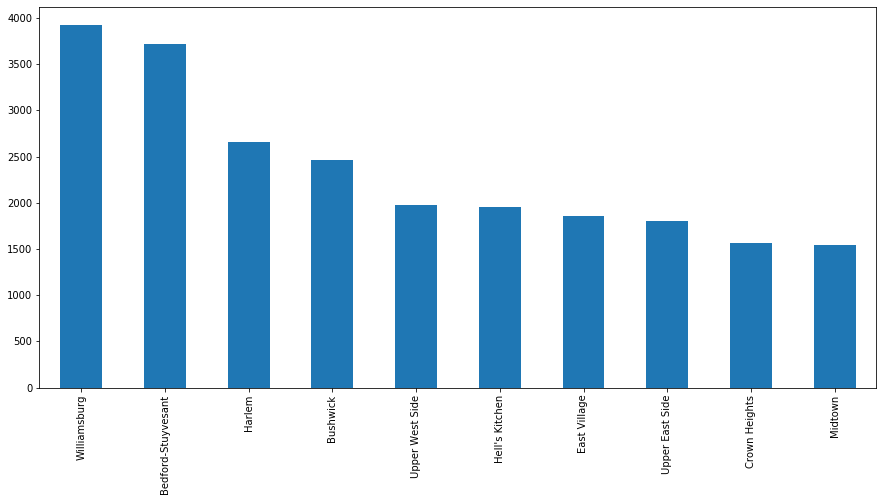

In [25]:
#sns.countplot(top_neighbourhood)
fig = plt.figure(figsize=(15,7))
top_neighbourhood.plot(kind='bar')

In [26]:
#Room Type 
data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [27]:
data.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

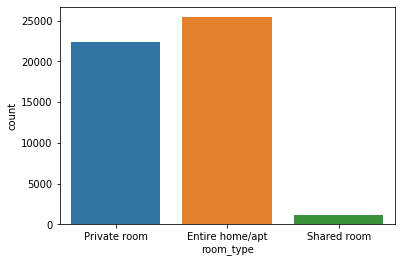

In [28]:
sns.countplot(data.room_type)

Seeing that there is a high demand for Entire home apartment and private room than there is for shared room. this may be due to privacy reasons. 

In [29]:
#Numerical Variables
num_features = data.select_dtypes(include=[np.number])

In [30]:
num_features.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,4632,40.80902,-73.94190,150,3,0,0.00,1,365
3,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,7192,40.79851,-73.94399,80,10,9,0.10,1,0


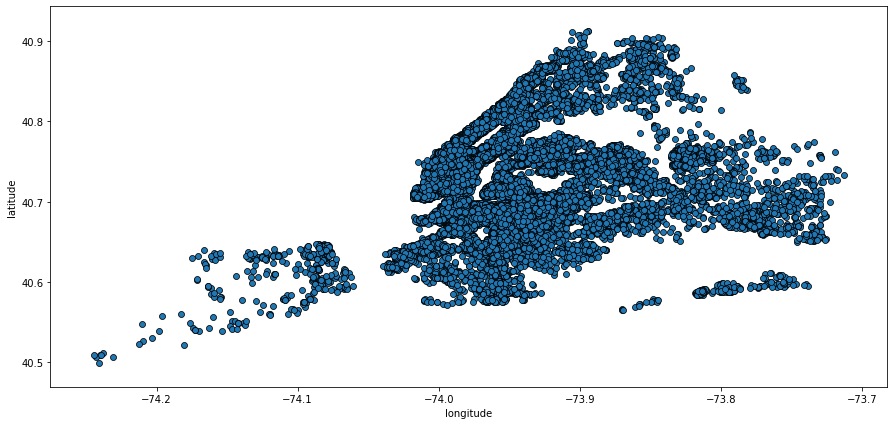

In [31]:
#Longitude vs Latitude 
fig = plt.figure(figsize=(15,7))
sns.scatterplot(x= 'longitude', y = 'latitude', data = data, edgecolor='black')

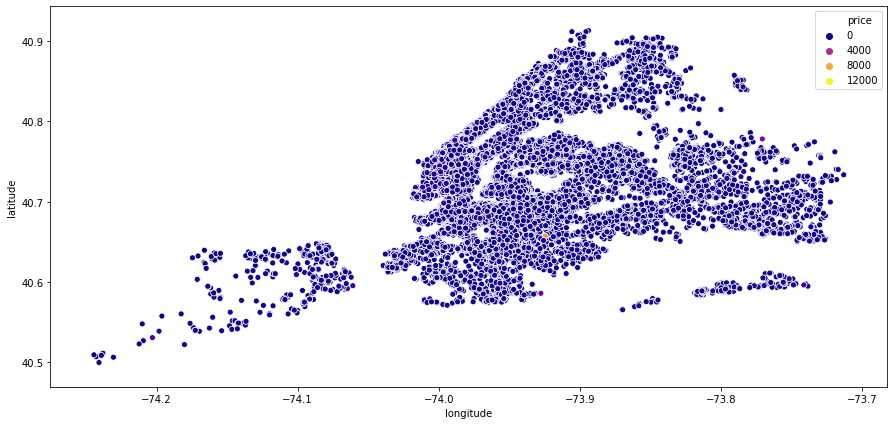

In [32]:
fig = plt.figure(figsize=(15,7))
sns.scatterplot(x= 'longitude', y = 'latitude', data = data, hue ='price' , palette = 'plasma')

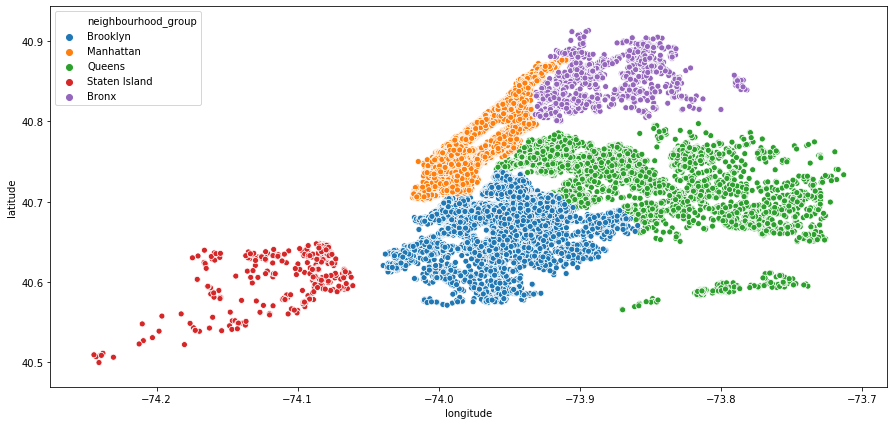

In [33]:
fig = plt.figure(figsize=(15,7))
sns.scatterplot(x= 'longitude', y = 'latitude', data = data, hue ='neighbourhood_group')

In [34]:
#fig = plt.figure(figsize=(15,7))
#sns.scatterplot(x= 'longitude', y = 'latitude', data = data, hue ='neighbourhood' )

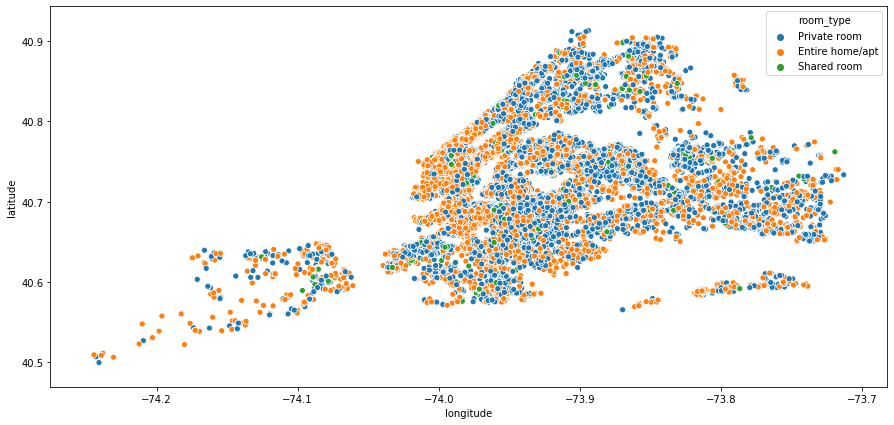

In [35]:
fig = plt.figure(figsize=(15,7))
sns.scatterplot(x= 'longitude', y = 'latitude', data = data, hue ='room_type' )

In [36]:
#Host Id: Lets see what hosts have the most listing 

top_host = data.host_id.value_counts().head(10)

top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

As we seek to find out who are the top hosts are, we discover that these hosts are rated top based on the number of listigs they have. The highest host has over 327 listings all over Manhattan neighbourhood group.  

In [37]:
data.nlargest(10,'calculated_host_listings_count')

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
38293,219517861,Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,0.00,327,309
38294,219517861,Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,0.73,327,219
38588,219517861,Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,0.60,327,159
39769,219517861,Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,1.86,327,91
39770,219517861,Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2.59,327,81
39771,219517861,Manhattan,Murray Hill,40.74845,-73.97446,Entire home/apt,245,2,4,0.94,327,137
39772,219517861,Manhattan,Hell's Kitchen,40.76188,-73.99616,Entire home/apt,185,29,1,1.00,327,281
39773,219517861,Manhattan,Hell's Kitchen,40.76037,-73.99744,Entire home/apt,185,29,1,1.00,327,332
39774,219517861,Manhattan,Murray Hill,40.74884,-73.97589,Entire home/apt,252,2,7,1.19,327,117
39775,219517861,Manhattan,Hell's Kitchen,40.76079,-73.99807,Entire home/apt,189,29,1,0.94,327,325


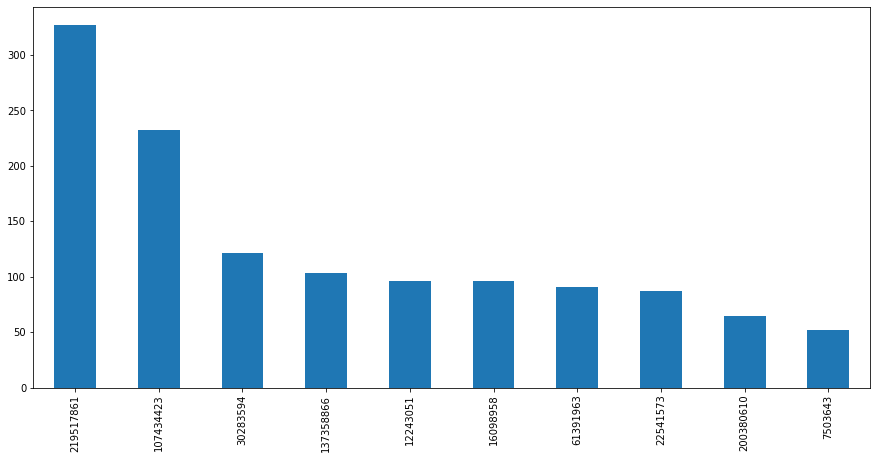

In [38]:
fig = plt.figure(figsize=(15,7))
top_host.plot(kind='bar')

# Bivariate Analysis

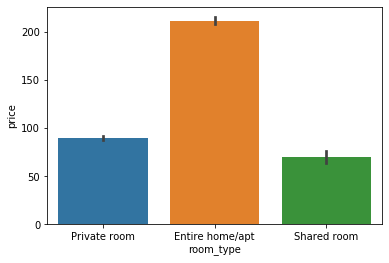

In [39]:
#Room TYpe vs PRICE 

sns.barplot(x= 'room_type', y='price', data= data)

As expected, we can see from above that the price for an entire apartment is more expensive than other room types. 

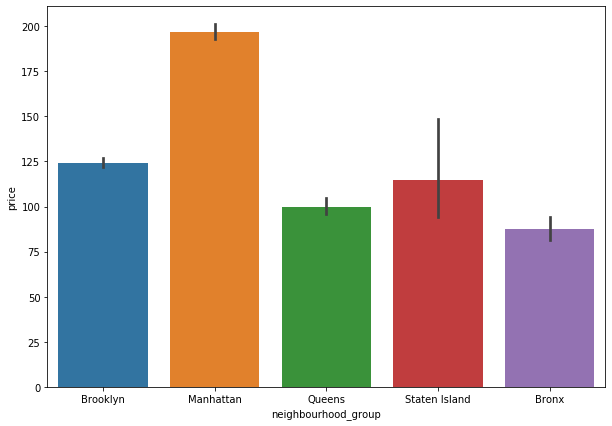

In [40]:
#Neighbourhood GRoup vs Price 
fig = plt.figure(figsize=(10,7))
sns.barplot(x='neighbourhood_group', y='price', data= data)

From above, we can see that most of the expensive apartments are in the Manhattan neighborhood groups. While the least expensive apartments can be found in the Bronx neighbourhood group. We can see that Manhattan has the highest mean price followed by Brooklyn. The average price for the manhattan neighbourhoood is around $190 while the average price for Brooklyn is $120. Queens and Staten island are almost alike but the Bronx is the lowest of them all

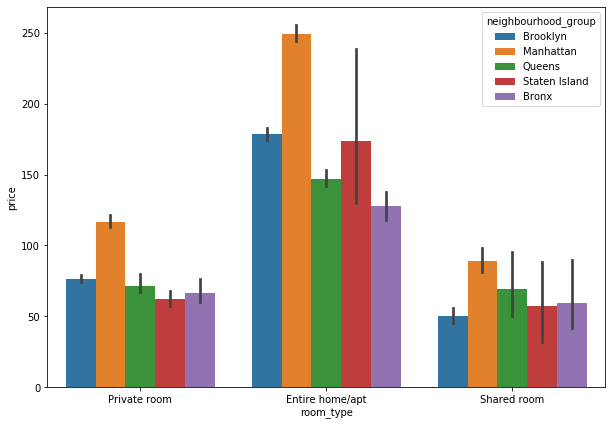

In [41]:
fig = plt.figure(figsize=(10,7))
sns.barplot(x= 'room_type', y='price', data= data, hue= 'neighbourhood_group')

 From above, we can deduce that the reason why Manhattan has the highest mean price is probably because it has mostly Entire home which are way more expensive than the other room type. 
Although the Brooklyn neighbiurhood group has more apartment in that are Private room we can see froom here that these rooms are not as expensive as those of the Entire home thats why the neighbourhood group is not the most expensive. 

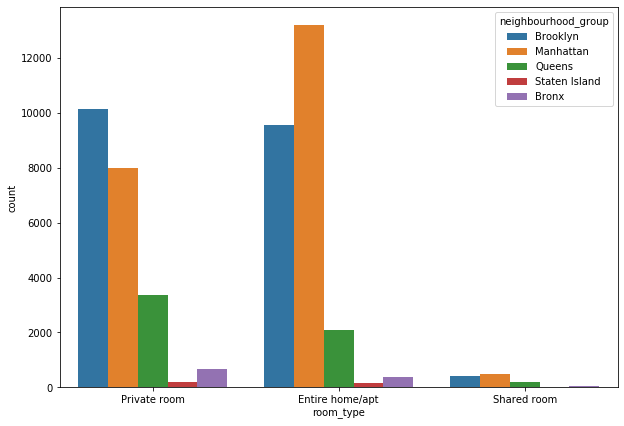

In [42]:
#Room type vs Neighbourhood Group
fig = plt.figure(figsize=(10,7))
sns.countplot(x= 'room_type', data= data, hue= 'neighbourhood_group')

From above, we can possibly deduce that the reason we have the Manhattan to be the most expensive neighbourhood group is because most of the apartment there are mostly Entire homes/apartment. Manhattan also has the highest price for these entire home. The next most neighbourhood group with high amount of wntire home is Brooklyn. 
We can also see that Brooklyn can boas of having more Private rooms than Manhattan

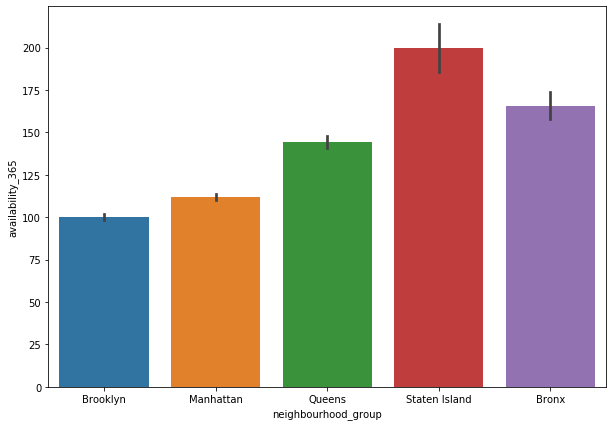

In [43]:
fig = plt.figure(figsize=(10,7))
sns.barplot(x= 'neighbourhood_group', y='availability_365', data= data)

From above,  we can see that the most availabe neighbouhood group to get an apartment in is the Staten Island followed by the Bronx. 

In [44]:
data.price.max()

10000

In [45]:
data.price.min()

0

In [46]:
#Average Price 
data.price.mean()

152.7206871868289

In [47]:
data[data.price==10000]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
9151,20582832,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0
17692,5143901,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0
29238,72390391,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.00,1,83


In [48]:
data[data.price==0]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23161,8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28
25433,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127
25634,15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0
25753,1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0
25778,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73
25794,86327101,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176
25795,86327101,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232
25796,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222
26259,13709292,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0.00,1,0
26841,101970559,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0.11,6,333


From above,  it seems that are there apartments that are free for anyone. 

In [49]:
data.nlargest(10,'price')

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
9151,20582832,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0
17692,5143901,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0
29238,72390391,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.00,1,83
6530,1235070,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,0.02,1,0
12342,3906464,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,0.14,1,83
40433,4382127,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,0.00,1,365
30268,18128455,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,0.18,1,251
4377,1177497,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,0.03,11,365
29662,156158778,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,0.00,12,146
42523,7407743,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,0.00,1,364


In [50]:
# TOp 10 Reviews 
data.nlargest(10,'number_of_reviews')

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


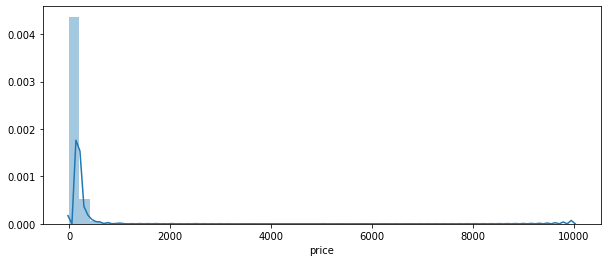

In [51]:
df1 = data[data['neighbourhood_group']=='Brooklyn']['price']
fig = plt.figure(figsize=(10,4))
sns.distplot(df1)

In [52]:
data[data['neighbourhood_group']=='Brooklyn']['price'].mean()

124.38320732192598

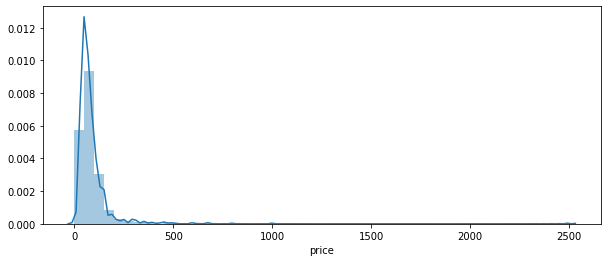

In [53]:
df1 = data[data['neighbourhood_group']=='Bronx']['price']
fig = plt.figure(figsize=(10,4))
sns.distplot(df1)

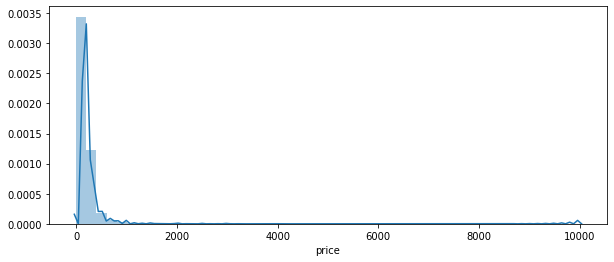

In [54]:
df1 = data[data['neighbourhood_group']=='Manhattan']['price']
fig = plt.figure(figsize=(10,4))
sns.distplot(df1)

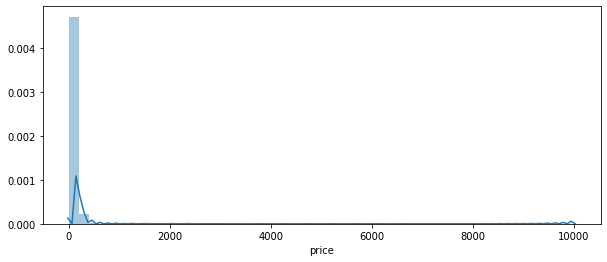

In [55]:
df1 = data[data['neighbourhood_group']=='Queens']['price']
fig = plt.figure(figsize=(10,4))
sns.distplot(df1)

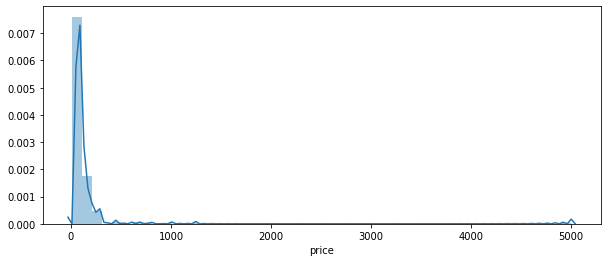

In [56]:
df1 = data[data['neighbourhood_group']=='Staten Island']['price']
fig = plt.figure(figsize=(10,4))
sns.distplot(df1)

In [57]:
n_pivot = data.pivot_table(index= data['neighbourhood_group'], values='price', aggfunc=np.mean)
n_pivot

,price
neighbourhood_group,
Bronx,87.496792
Brooklyn,124.383207
Manhattan,196.875814
Queens,99.517649
Staten Island,114.812332


In [58]:
d_pivot = data.pivot_table(index= data['room_type'], values='price', aggfunc=np.mean)
d_pivot

,price
room_type,
Entire home/apt,211.794246
Private room,89.780973
Shared room,70.127586


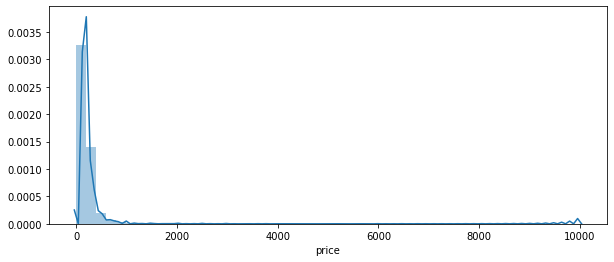

In [59]:
df1 = data[data['room_type']=='Entire home/apt']['price']
fig = plt.figure(figsize=(10,4))
sns.distplot(df1)

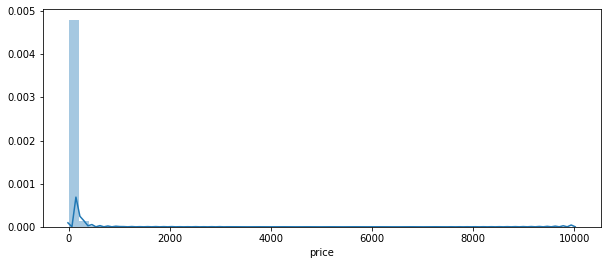

In [60]:
df1 = data[data['room_type']=='Private room']['price']
fig = plt.figure(figsize=(10,4))
sns.distplot(df1)

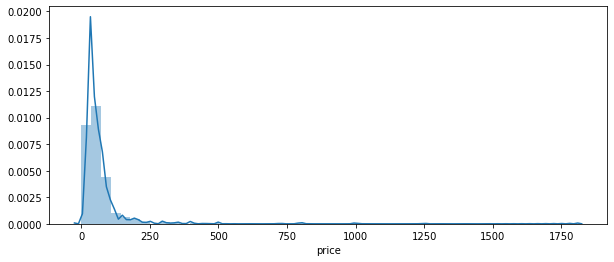

In [61]:
df1 = data[data['room_type']=='Shared room']['price']
fig = plt.figure(figsize=(10,4))
sns.distplot(df1)

In [62]:
min_pivot = data.pivot_table(index= data['room_type'], values='minimum_nights', aggfunc=np.mean)
min_pivot

,minimum_nights
room_type,
Entire home/apt,8.506907
Private room,5.377900
Shared room,6.475000


In [63]:
#No of Reviews 

top_reviews = data.nlargest(10, 'number_of_reviews')
top_reviews

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0
